Este notebook se centra en el análisis de la influencia de la aplicación de transformaciones correctivas en coordenadas cartesianas de la data obtenida por simulaciones en CRPropa3 con un observador situado en casos de entre el centro de la galaxia (0,0,0) y la Tierra (-8.5,0,0) kpc.

### Paso 1: Importando las liberías necesarias

In [42]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Paso 2: Ploteo de cada caso en coordenadas galácticas aplicando transformación

In [43]:
#Obtención y transformación a coord. galácticas de las fuentes a una distancia de 20 kpc
sources = np.genfromtxt('Data/G_sources_cartesian_in_the_border_of_thegalaxy.txt',names=True)
ds=SkyCoord(sources['X']*u.kpc, sources['Y']*u.kpc,sources['Z']*u.kpc, representation_type='cartesian')
ds=ds.galactic

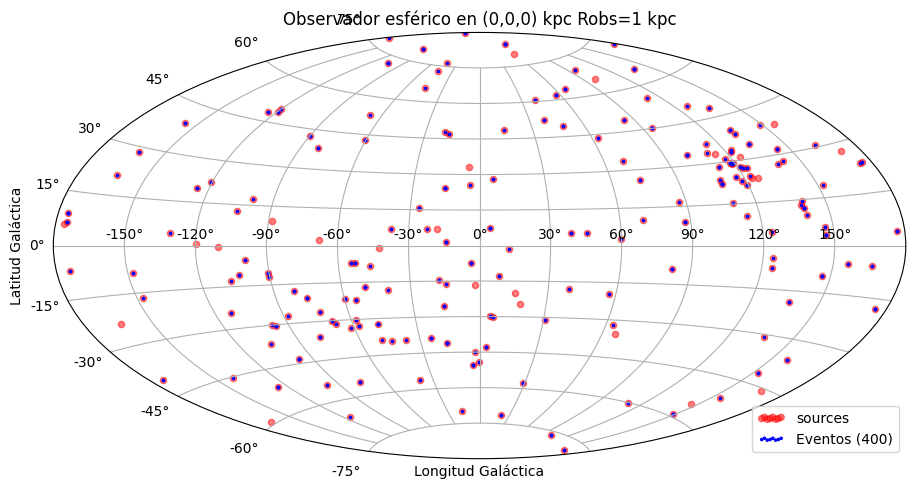

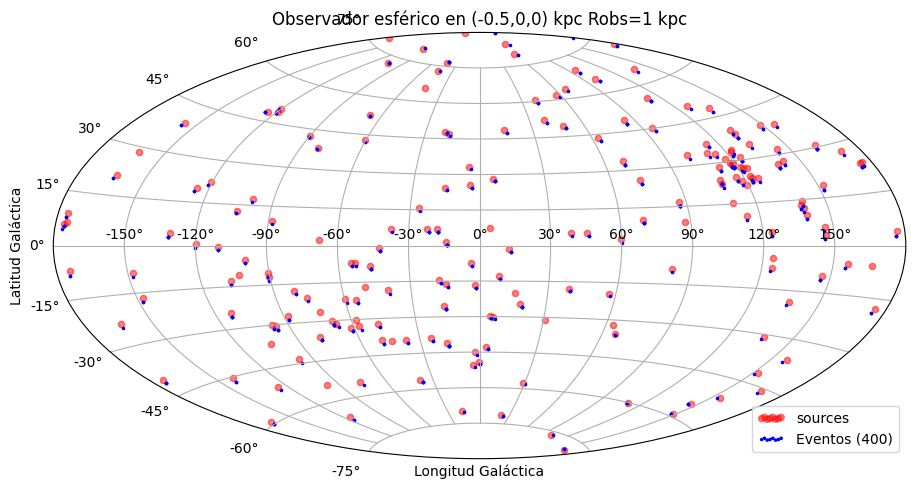

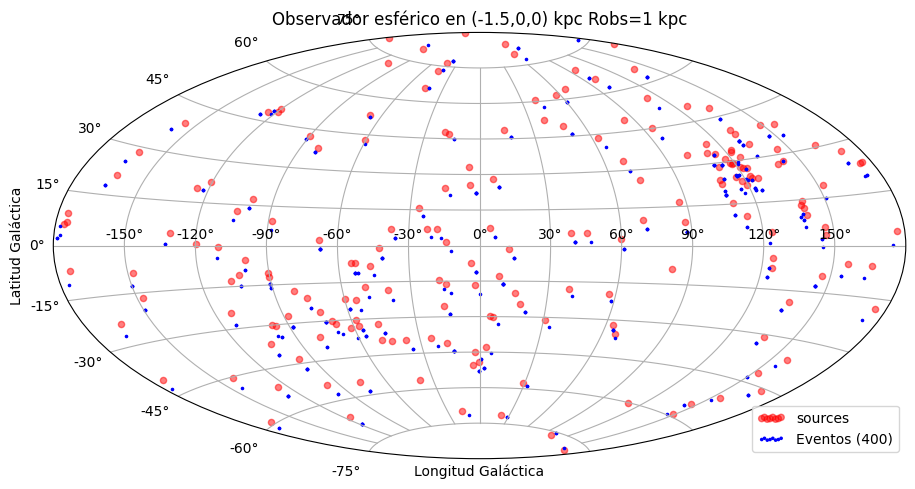

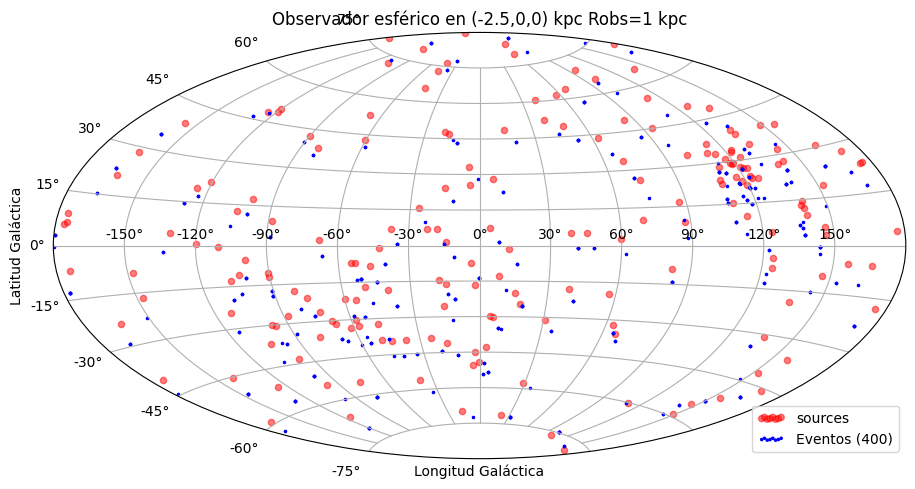

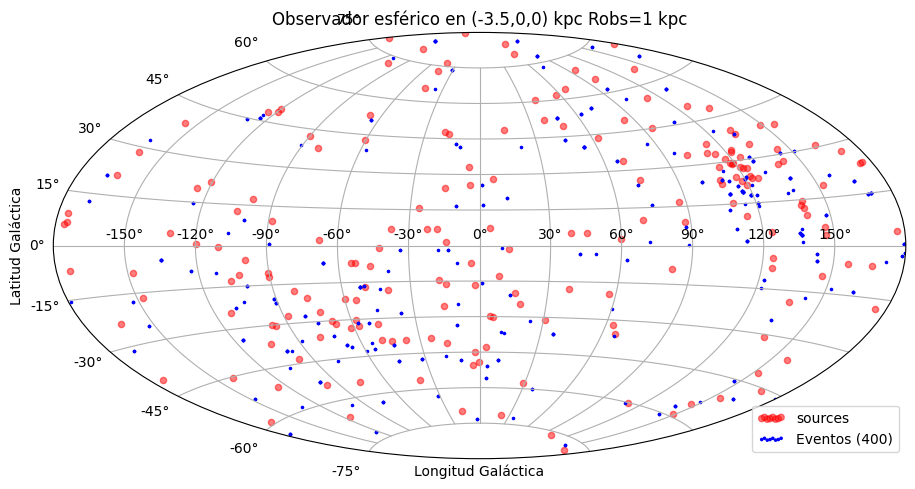

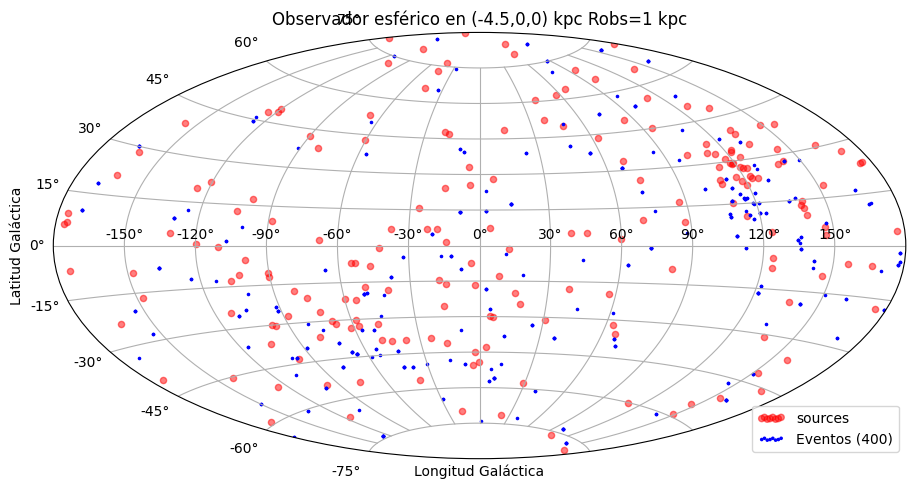

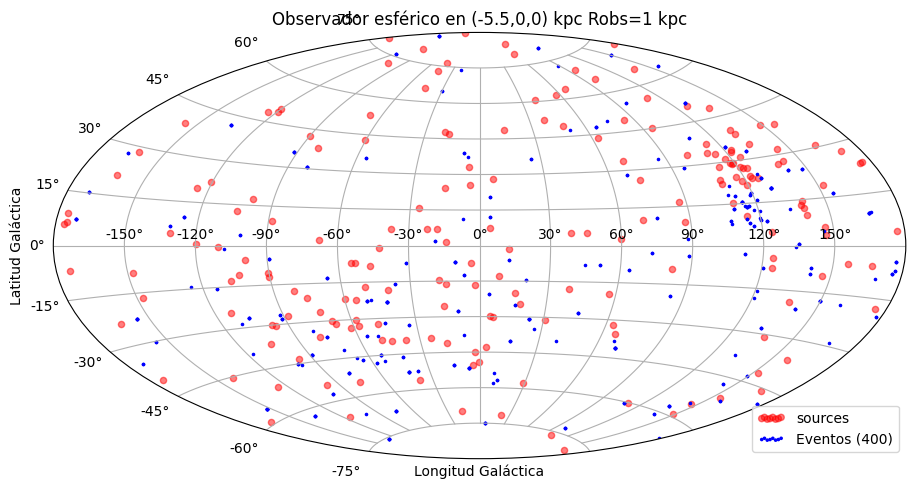

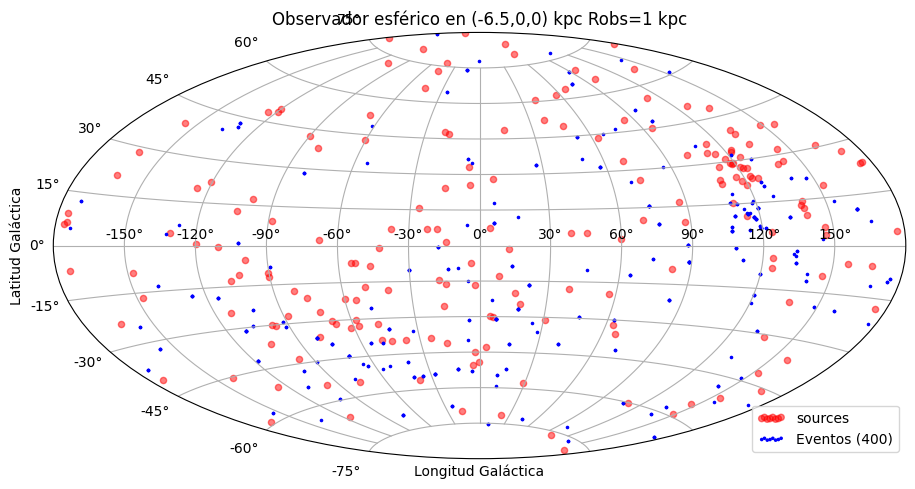

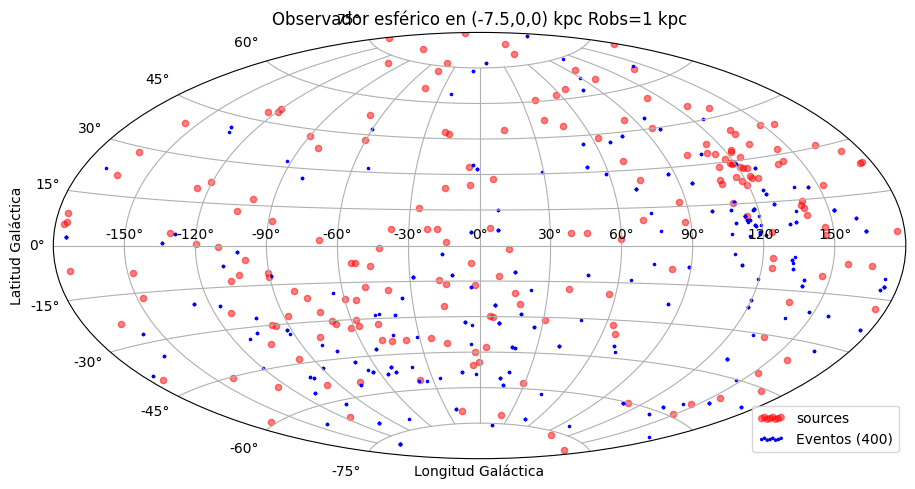

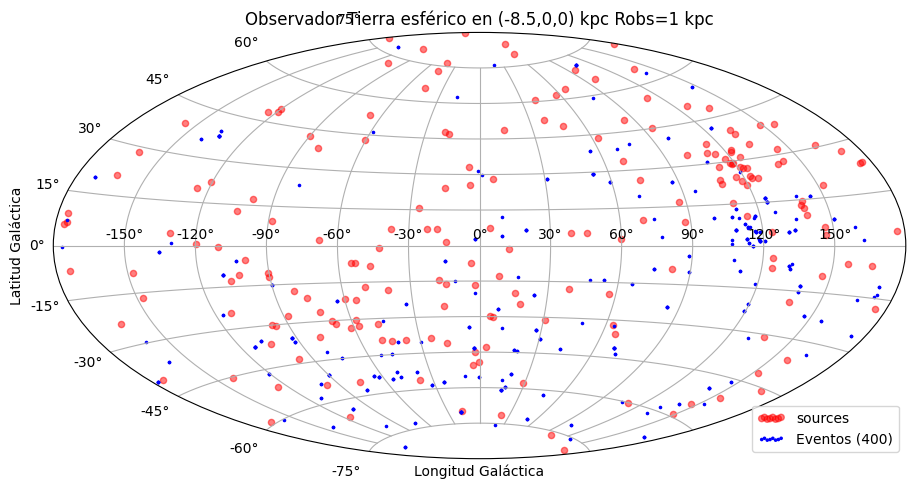

In [44]:
#Función para graficar mapas en coordenadas galácticas de la data aplicando una transformación en x a eventos
def plot_case(data_filename, title, delta_x=0.0):
    
    d = np.genfromtxt(data_filename, names=True)
    c = SkyCoord(x=(d['X'] + delta_x), y=d['Y'], z=d['Z'], unit='Mpc', representation_type='cartesian')
    g = c.galactic
    
    fig = plt.figure(figsize=(11, 8))
    ax = fig.add_subplot(111, projection='aitoff')
    
    ax.scatter(ds.l.wrap_at('180d').radian, ds.b.radian, color='red', s=20, alpha=0.5, label="sources")
    ax.scatter(g.l.wrap_at('180d').radian, g.b.radian, color='blue', label=f'Eventos ({len(g)})', s=10, marker='.')
    
    ax.grid(True)
    plt.xlabel('Longitud Galáctica')
    plt.ylabel('Latitud Galáctica')
    plt.title(title)
    plt.legend(loc='lower right', fontsize=10, scatterpoints=8)
    
    return fig

# Lista de casos que deseas representar en el multiplot
cases = [
    {
        'data_filename': 'Data/events_JF12_fixedsources_d=-0.0kpc.txt',
        'title': 'Observador esférico en (0,0,0) kpc Robs=1 kpc'
    },
    {
        'data_filename': 'Data/events_JF12_fixedsources_d=-0.5kpc.txt',
        'title': 'Observador esférico en (-0.5,0,0) kpc Robs=1 kpc',
        'delta_x': 0.5 * 10**-3
    },
    {
        'data_filename': 'Data/events_JF12_fixedsources_d=-1.5kpc.txt',
        'title': 'Observador esférico en (-1.5,0,0) kpc Robs=1 kpc',
        'delta_x': 1.5 * 10**-3
    },{
        'data_filename': 'Data/events_JF12_fixedsources_d=-2.5kpc.txt',
        'title': 'Observador esférico en (-2.5,0,0) kpc Robs=1 kpc',
        'delta_x': 2.5 * 10**-3
    },{
        'data_filename': 'Data/events_JF12_fixedsources_d=-3.5kpc.txt',
        'title': 'Observador esférico en (-3.5,0,0) kpc Robs=1 kpc',
        'delta_x': 3.5 * 10**-3
    },{
        'data_filename': 'Data/events_JF12_fixedsources_d=-4.5kpc.txt',
        'title': 'Observador esférico en (-4.5,0,0) kpc Robs=1 kpc',
        'delta_x': 4.5 * 10**-3
    },{
        'data_filename': 'Data/events_JF12_fixedsources_d=-5.5kpc.txt',
        'title': 'Observador esférico en (-5.5,0,0) kpc Robs=1 kpc',
        'delta_x': 5.5 * 10**-3
    },{
        'data_filename': 'Data/events_JF12_fixedsources_d=-6.5kpc.txt',
        'title': 'Observador esférico en (-6.5,0,0) kpc Robs=1 kpc',
        'delta_x': 6.5 * 10**-3
    },{
        'data_filename': 'Data/events_JF12_fixedsources_d=-7.5kpc.txt',
        'title': 'Observador esférico en (-7.5,0,0) kpc Robs=1 kpc',
        'delta_x': 7.5 * 10**-3
    },{
        'data_filename': 'Data/events_JF12_fixedsources_d=-8.5kpc.txt',
        'title': 'Observador Tierra esférico en (-8.5,0,0) kpc Robs=1 kpc',
        'delta_x': 8.5 * 10**-3
    },
]

# Genera y muestra cada gráfico individual
for case in cases:
    plot_case(case['data_filename'], case['title'], delta_x=case.get('delta_x', 0.0))
    plt.show()

### Paso 3: Creación de data Frames para el análisis de datos

In [45]:
# Calcula la diferencia entre las longitudes
def calcular_desviacion_angular(l, l0):
    
    diferencia = l - l0
    
    if diferencia <= 0:
        diferencia2 = diferencia + 360
        if abs(diferencia2) <= abs(diferencia):
            return diferencia2
        else:
            return diferencia
    elif diferencia > 0:
        diferencia2 = diferencia - 360
        if abs(diferencia2) <= abs(diferencia):
            return diferencia2
        else:
            return diferencia
    



# Lista de valores de desplazamiento
delta_values = [-0.0, -0.5, -1.5, -2.5, -3.5, -4.5, -5.5, -6.5, -7.5, -8.5]

# Lista para almacenar los DataFrames
case_dfs = []

for delta in delta_values:
    # Genera el nombre del archivo basado en el valor de delta
    filename = f'Data/events_JF12_fixedsources_d={delta}kpc.txt'
    
    # Carga los datos desde el archivo
    d = np.genfromtxt(filename, names=True)
    
    # Crea un DataFrame para el caso actual
    case_df = pd.DataFrame(columns=['X', 'Y', 'Z', 'X0', 'Y0', 'Z0'], index=range(0, len(d)))
    
    case_df['X'] = d['X']
    case_df['Y'] = d['Y']
    case_df['Z'] = d['Z']
    case_df['X0'] = d['X0']
    case_df['Y0'] = d['Y0']
    case_df['Z0'] = d['Z0']
    
    c = SkyCoord(x=(d['X']-delta*10**-3), y=d['Y'], z=d['Z'], unit='Mpc', representation_type='cartesian')
    g = c.galactic
    
    c0 = SkyCoord(x=d['X0'], y=d['Y0'], z=d['Z0'], unit='Mpc', representation_type='cartesian')
    g0 = c0.galactic
    
    case_df['l (°)'] = g.l.degree
    case_df['b (°)'] = g.b.degree
    
    case_df['l0 (°)'] = g0.l.degree
    case_df['b0 (°)'] = g0.b.degree
    
    case_df = case_df.dropna()

    case_df['Δl(°)'] = case_df.apply(lambda row: calcular_desviacion_angular(row['l (°)'], row['l0 (°)']), axis=1)
    case_df['Δb(°)'] = case_df.apply(lambda row: calcular_desviacion_angular(row['b (°)'], row['b0 (°)']), axis=1)
    
    case_df['|Δl(°)|'] = case_df['Δl(°)'].abs()
    case_df['|Δb(°)|'] = case_df['Δb(°)'].abs()
    
    case_dfs.append(case_df)


### Paso 4: Ploteo de desviaciones casos específicos

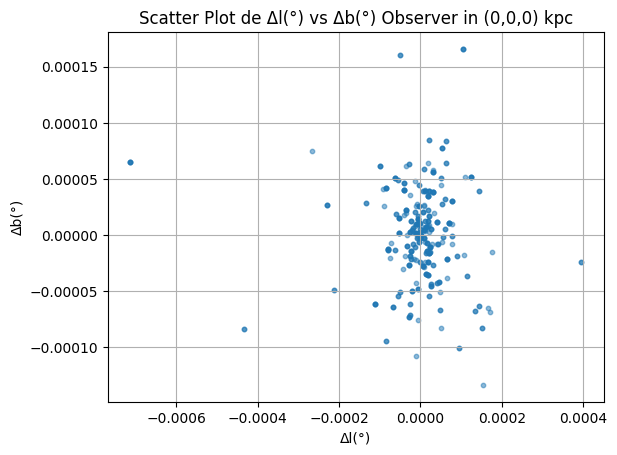

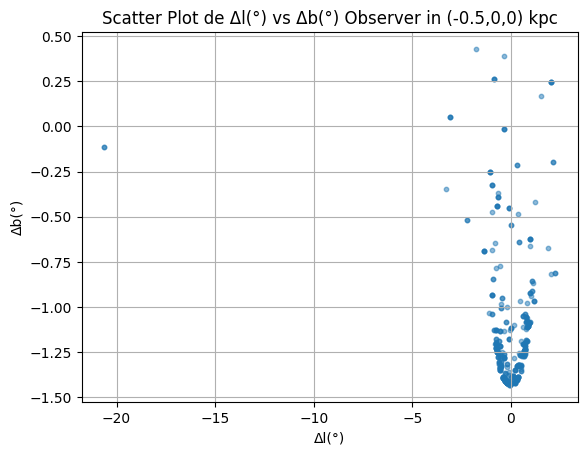

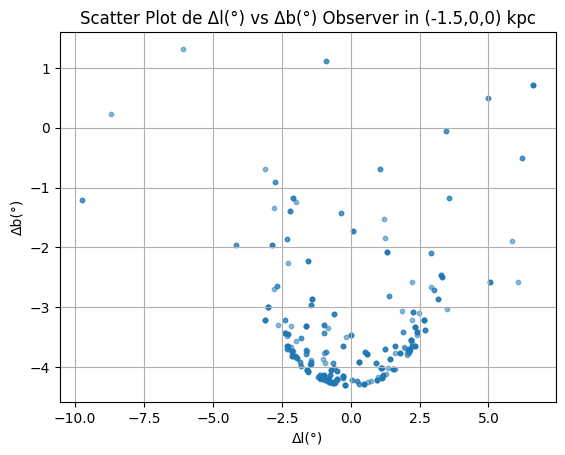

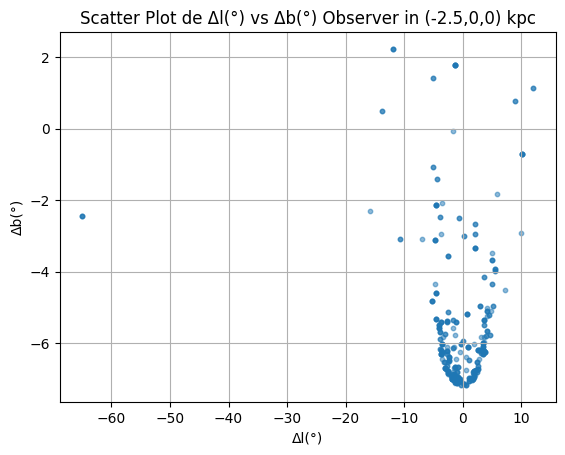

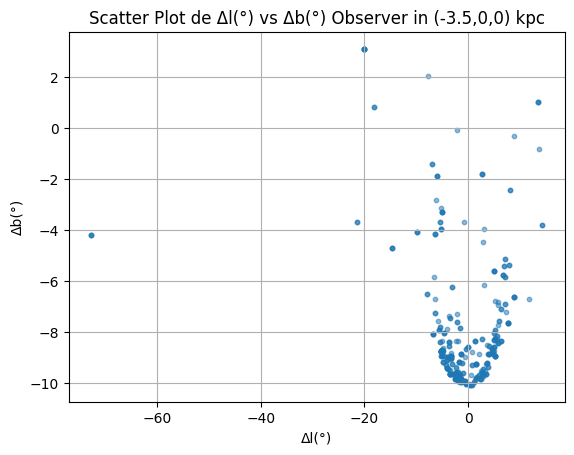

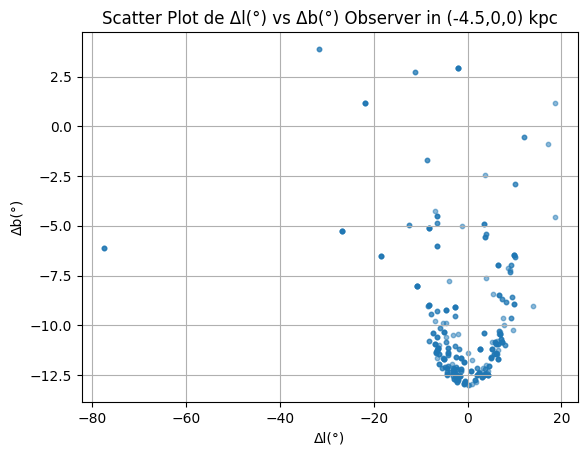

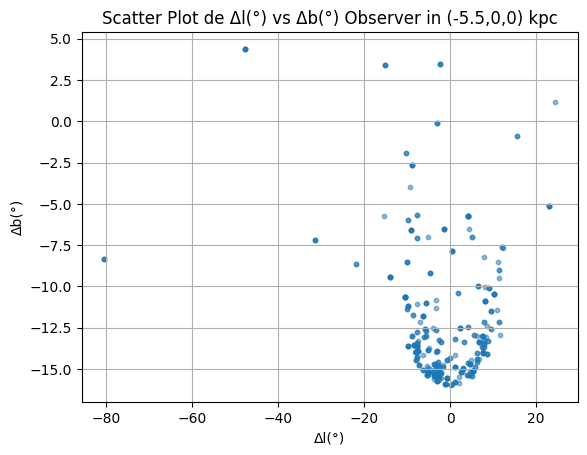

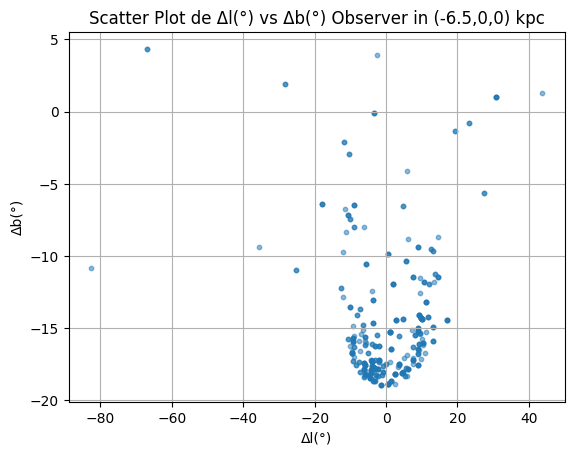

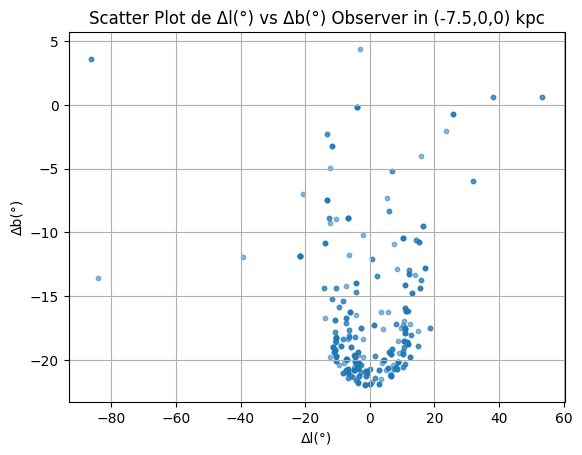

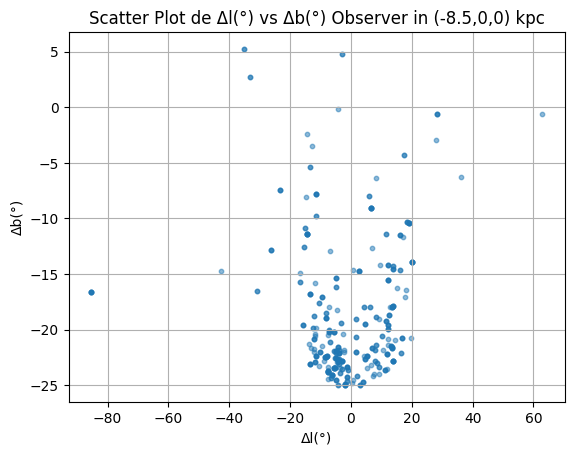

In [46]:
d=['(0,0,0) kpc','(-0.5,0,0) kpc','(-1.5,0,0) kpc','(-2.5,0,0) kpc','(-3.5,0,0) kpc','(-4.5,0,0) kpc','(-5.5,0,0) kpc','(-6.5,0,0) kpc','(-7.5,0,0) kpc','(-8.5,0,0) kpc']

for df,dis in zip(case_dfs,d):
    delta_l = df['Δl(°)']
    delta_b = df['Δb(°)']
  
    # Crear el scatter plot
    plt.scatter(delta_l, delta_b, s=10, alpha=0.5)  

    # Etiquetas de los ejes
    plt.xlabel('Δl(°)')
    plt.ylabel('Δb(°)')

    # Título del gráfico
    plt.title('Scatter Plot de Δl(°) vs Δb(°) Observer in '+dis)
    plt.grid()
    plt.savefig('Plots/var_error_long_gal_vs_lat_gal_'+'obs='+dis+'.jpg')
    # Mostrar el gráfico
    plt.show()


### Paso 5: Ploteo de histogramas

In [47]:
var_l_mean_values=[df['|Δl(°)|'].mean() for df in case_dfs]
var_b_mean_values=[df['|Δb(°)|'].mean() for df in case_dfs]

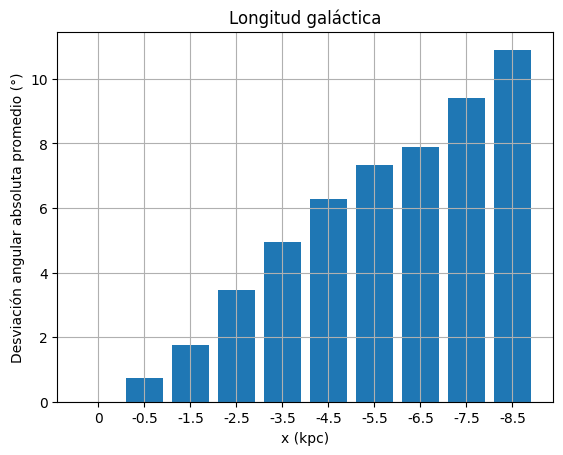

In [48]:
x_coord_cart = ['0', '-0.5', '-1.5', '-2.5', '-3.5','-4.5','-5.5','-6.5','-7.5','-8.5']

plt.bar(x_coord_cart, var_l_mean_values)
plt.xlabel('x (kpc)')
plt.ylabel('Desviación angular absoluta promedio (°)')
plt.title('Longitud galáctica')
plt.grid()
plt.savefig('Plots/var_gal_long_x_dist.jpg')
plt.show()

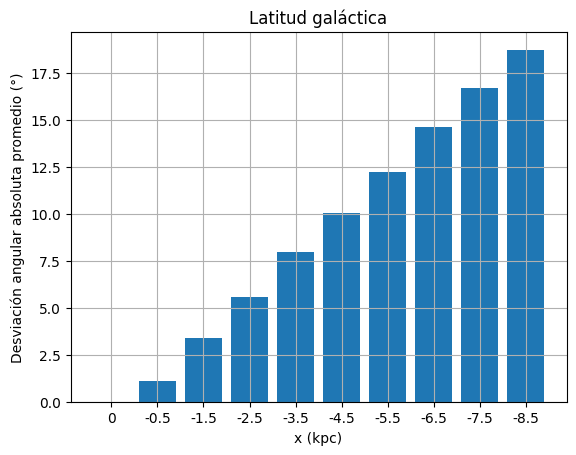

In [49]:
plt.bar(x_coord_cart, var_b_mean_values)
plt.xlabel('x (kpc)')
plt.ylabel('Desviación angular absoluta promedio (°)')
plt.title('Latitud galáctica')
plt.grid()
plt.savefig('Plots/var_gal_lat_x_dist.jpg')
plt.show()

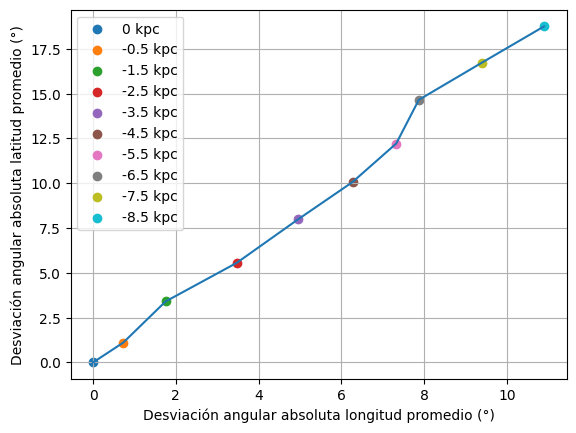

In [50]:
for i in range(len(x_coord_cart)):
    plt.scatter(var_l_mean_values[i], var_b_mean_values[i], label=str(x_coord_cart[i])+ ' kpc' )

plt.plot(var_l_mean_values, var_b_mean_values)
plt.xlabel('Desviación angular absoluta longitud promedio (°)')
plt.ylabel('Desviación angular absoluta latitud promedio (°)')

plt.legend()
plt.grid()
plt.savefig('Plots/var_coord_gal_dist.jpg')
plt.show()

### Paso 6: Desviación angular aplicando transformaciones a las coordenadas de las fuentes

In [51]:

# Lista para almacenar los DataFrames
case_dfs = []

for delta in delta_values:
    # Genera el nombre del archivo basado en el valor de delta
    filename = f'Data/events_JF12_fixedsources_d={delta}kpc.txt'
    
    # Carga los datos desde el archivo
    d = np.genfromtxt(filename, names=True)
    
    # Crea un DataFrame para el caso actual
    case_df = pd.DataFrame(columns=['X', 'Y', 'Z', 'X0', 'Y0', 'Z0'], index=range(0, len(d)))
    
    case_df['X'] = d['X']
    case_df['Y'] = d['Y']
    case_df['Z'] = d['Z']
    case_df['X0'] = d['X0']
    case_df['Y0'] = d['Y0']
    case_df['Z0'] = d['Z0']
    
    c = SkyCoord(x=(d['X']-delta*10**-3), y=d['Y'], z=d['Z'], unit='Mpc', representation_type='cartesian')
    g = c.galactic
    
    c0 = SkyCoord(x=(d['X0']-delta*10**-3), y=d['Y0'], z=d['Z0'], unit='Mpc', representation_type='cartesian')
    g0 = c0.galactic
    
    case_df['l (°)'] = g.l.degree
    case_df['b (°)'] = g.b.degree
    
    case_df['l0 (°)'] = g0.l.degree
    case_df['b0 (°)'] = g0.b.degree
    
    case_df = case_df.dropna()

    case_df['Δl(°)'] = case_df.apply(lambda row: calcular_desviacion_angular(row['l (°)'], row['l0 (°)']), axis=1)
    case_df['Δb(°)'] = case_df.apply(lambda row: calcular_desviacion_angular(row['b (°)'], row['b0 (°)']), axis=1)
    
    case_df['|Δl(°)|'] = case_df['Δl(°)'].abs()
    case_df['|Δb(°)|'] = case_df['Δb(°)'].abs()
    
    case_dfs.append(case_df)



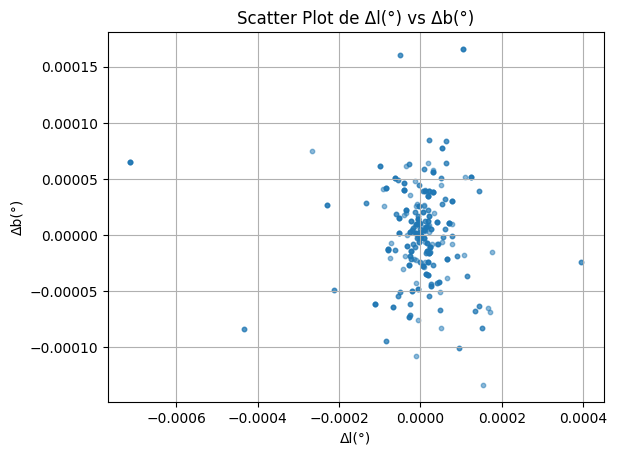

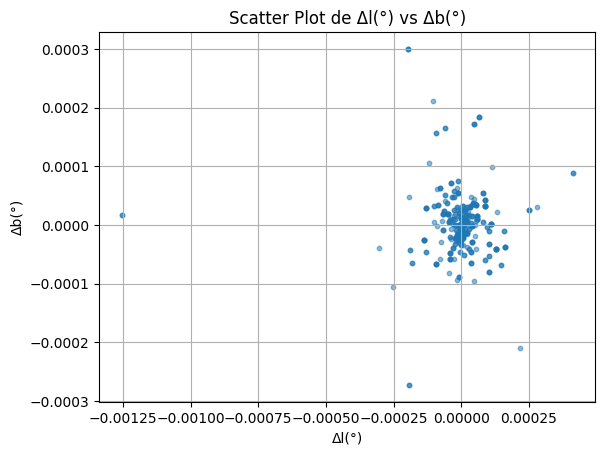

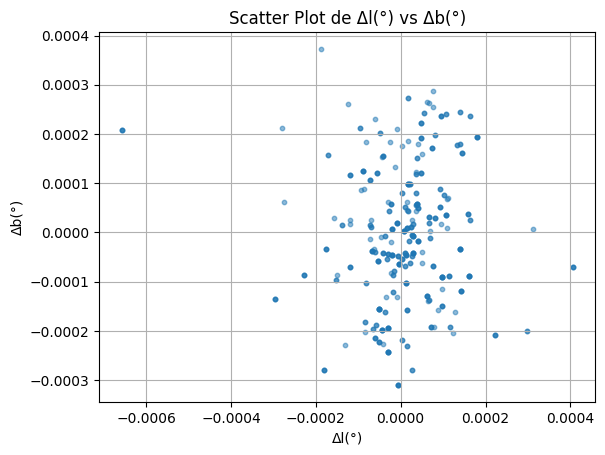

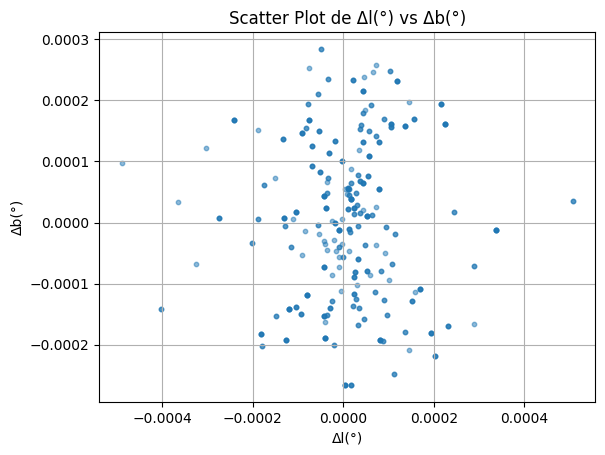

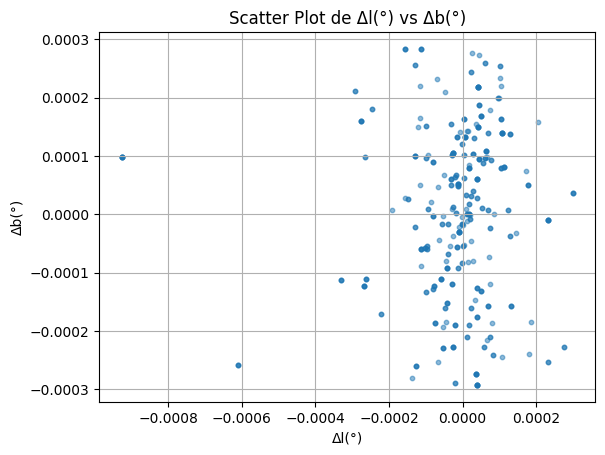

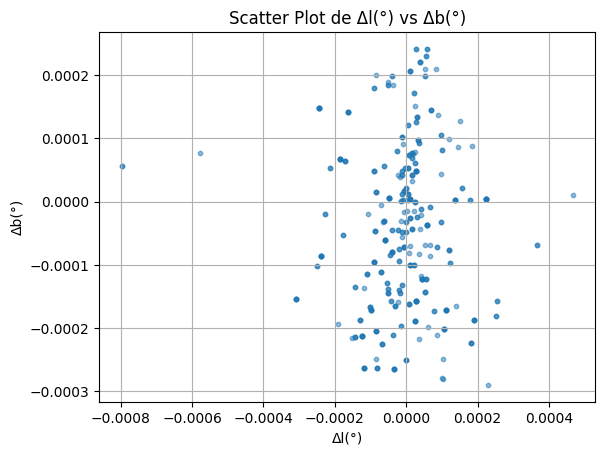

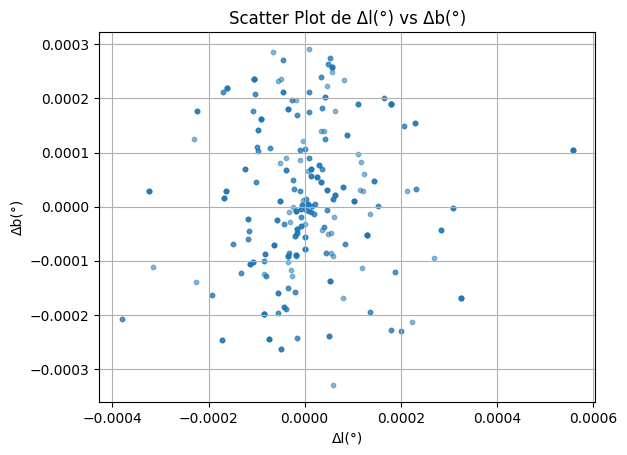

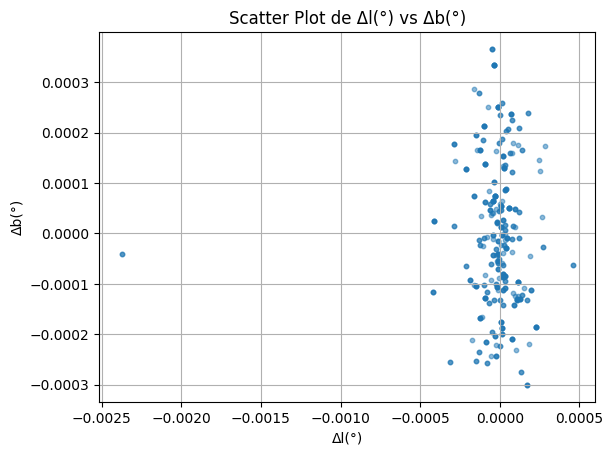

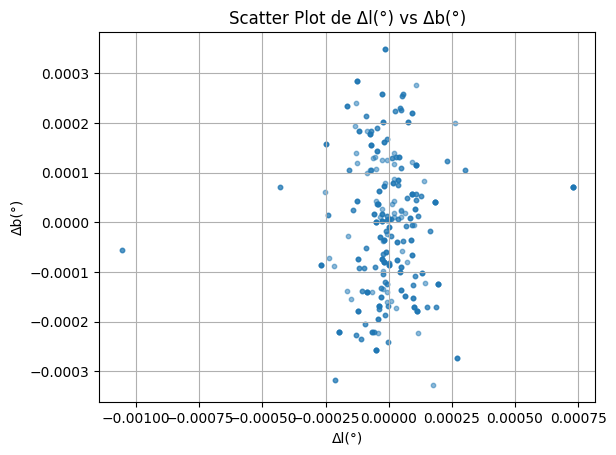

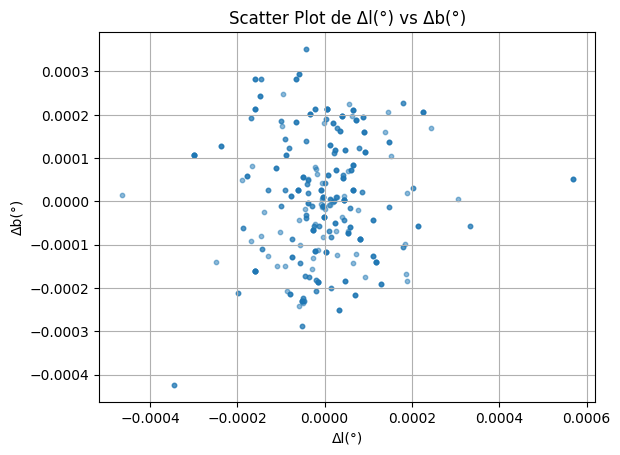

In [52]:
for df in case_dfs:
    delta_l = df['Δl(°)']
    delta_b = df['Δb(°)']

    # Crear el scatter plot
    plt.scatter(delta_l, delta_b, s=10, alpha=0.5)  

    # Etiquetas de los ejes
    plt.xlabel('Δl(°)')
    plt.ylabel('Δb(°)')

    # Título del gráfico
    plt.title('Scatter Plot de Δl(°) vs Δb(°)')
    plt.grid()
    # Mostrar el gráfico
    plt.show()

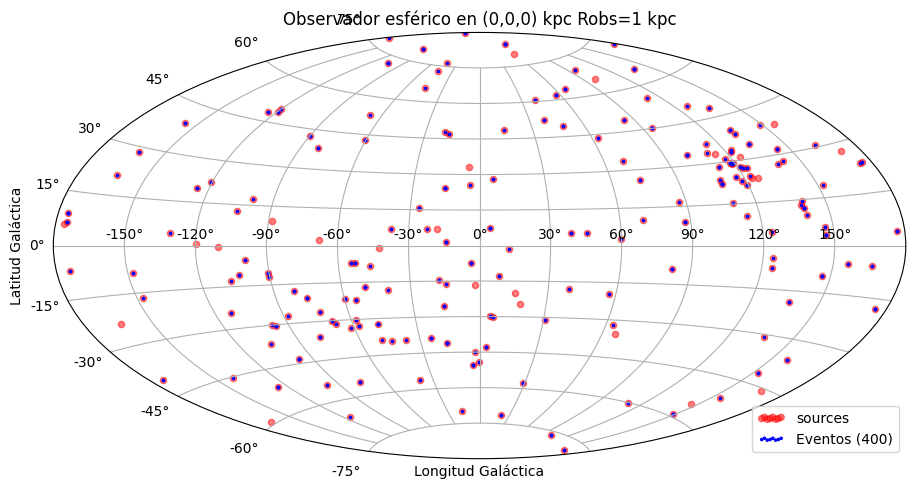

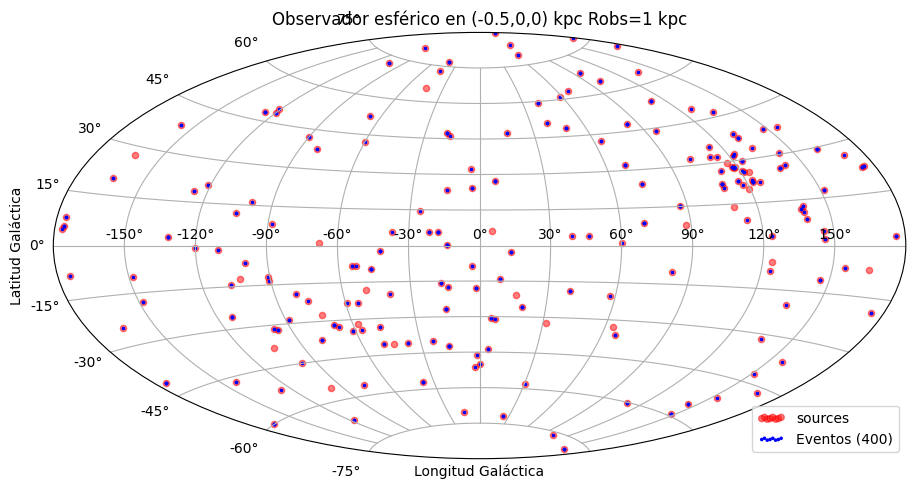

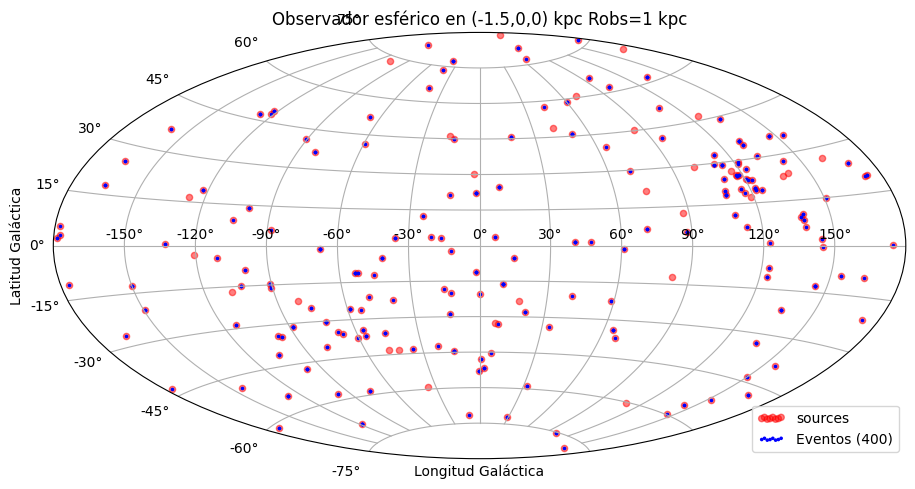

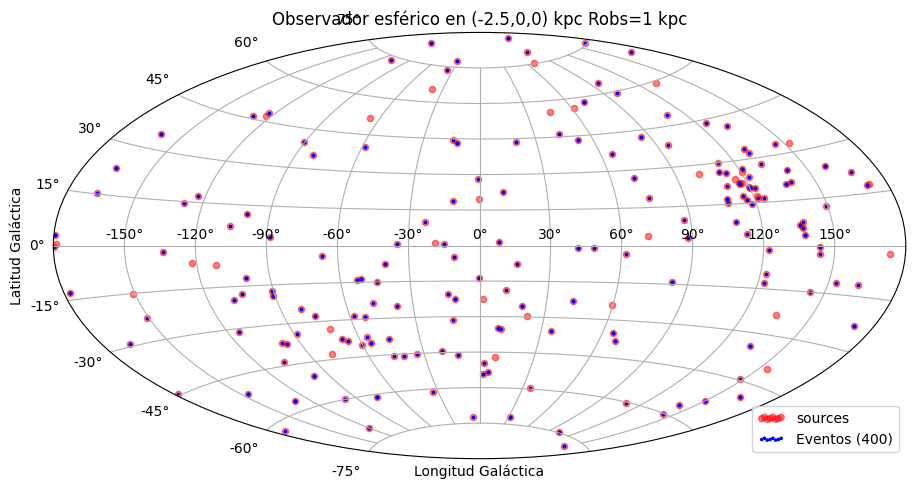

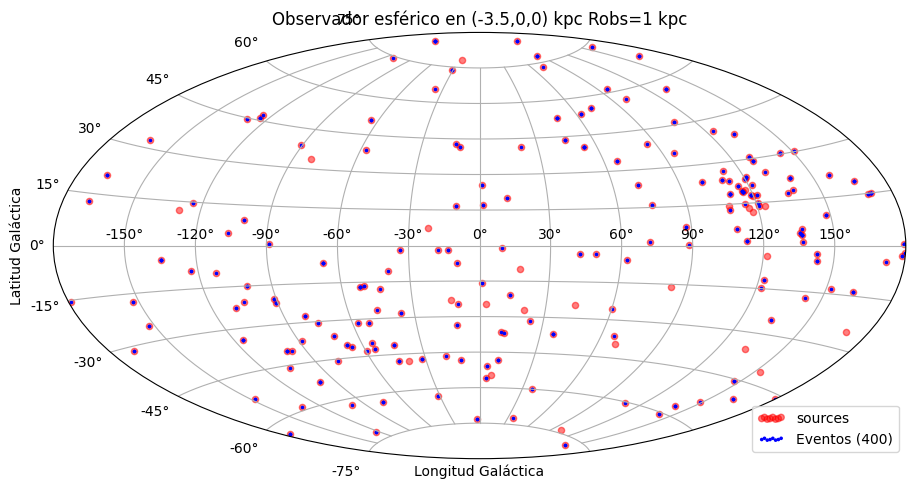

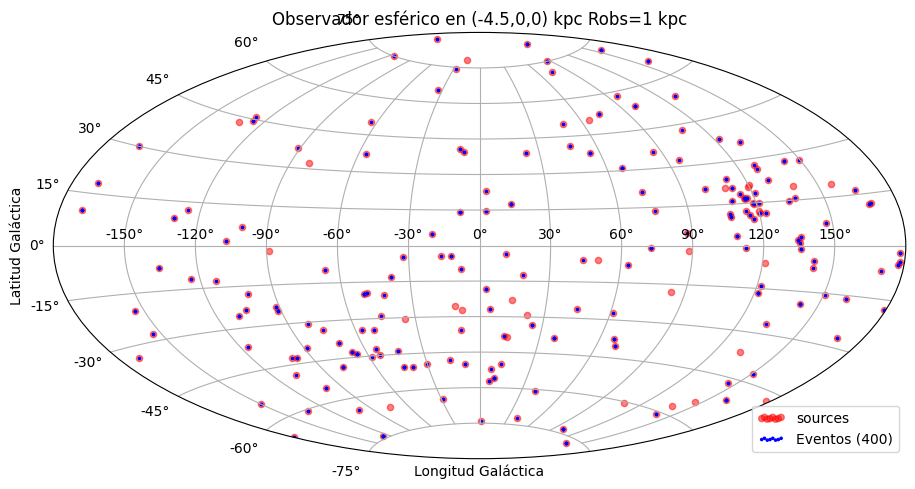

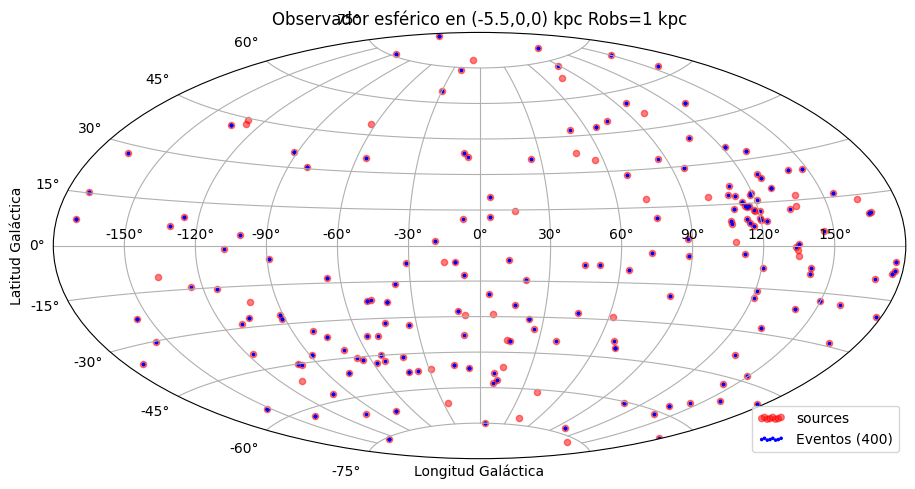

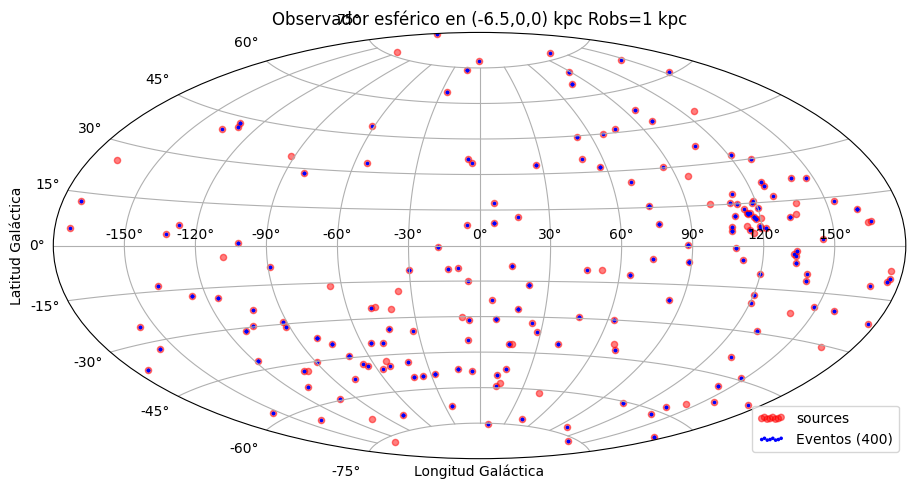

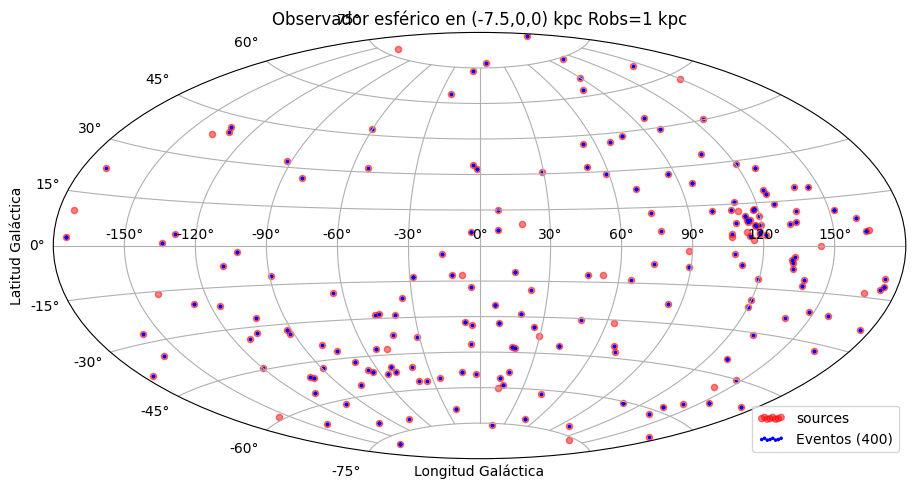

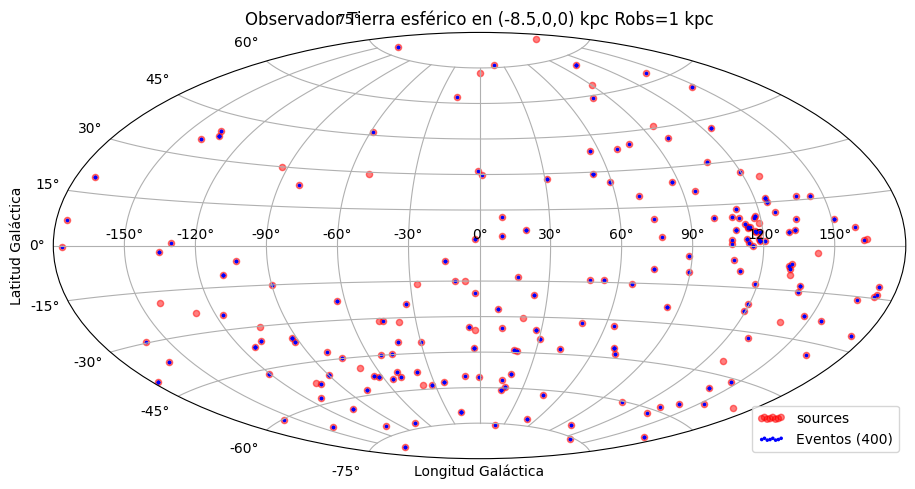

In [53]:
#Función para graficar mapas en coordenadas galácticas de la data aplicando una transformación en x a fuentes y eventos
def plot_case2(data_filename, title, delta_x=0.0):
    
    ds=SkyCoord(sources['X']*u.kpc+delta_x*10**3*u.kpc, sources['Y']*u.kpc,sources['Z']*u.kpc, representation_type='cartesian')
    ds=ds.galactic

    d = np.genfromtxt(data_filename, names=True)
    c = SkyCoord(x=(d['X'] + delta_x), y=d['Y'], z=d['Z'], unit='Mpc', representation_type='cartesian')
    g = c.galactic
    
    fig = plt.figure(figsize=(11, 8))
    ax = fig.add_subplot(111, projection='aitoff')
    
    ax.scatter(ds.l.wrap_at('180d').radian, ds.b.radian, color='red', s=20, alpha=0.5, label="sources")
    ax.scatter(g.l.wrap_at('180d').radian, g.b.radian, color='blue', label=f'Eventos ({len(g)})', s=10, marker='.')
    
    ax.grid(True)
    plt.xlabel('Longitud Galáctica')
    plt.ylabel('Latitud Galáctica')
    plt.title(title)
    plt.legend(loc='lower right', fontsize=10, scatterpoints=8)
    
    return fig


# Genera y muestra cada gráfico individual
for case in cases:
    plot_case2(case['data_filename'], case['title'], delta_x=case.get('delta_x', 0.0))
    plt.show()

### Paso 7: Aplicación de vector correción angular fuentes en coordenadas aparentes/ eventos primados posición = Tierra

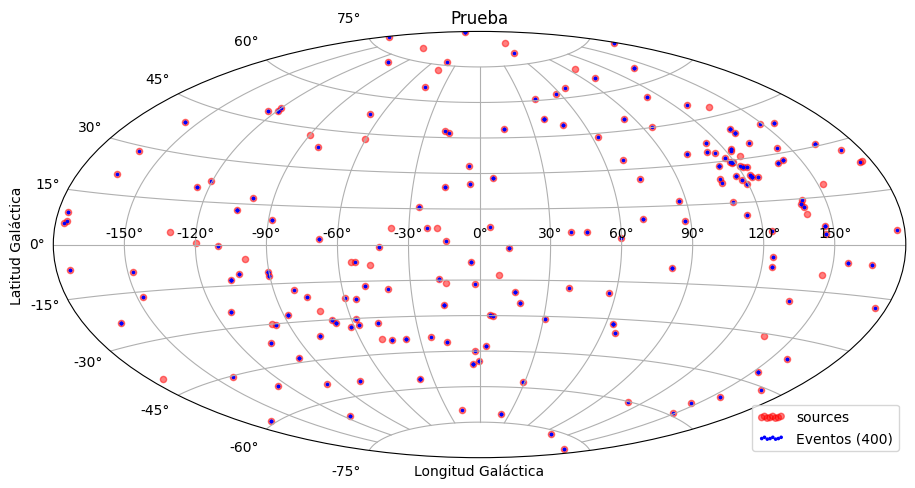

In [54]:
#Obtención y transformación a coord. galácticas de las fuentes
sources = np.genfromtxt('Data/G_sources_cartesian_in_the_border_of_thegalaxy.txt',names=True)
ds=SkyCoord(sources['X']*u.kpc, sources['Y']*u.kpc,sources['Z']*u.kpc, representation_type='cartesian')
ds=ds.galactic

d = np.genfromtxt('Data/events_JF12_fixedsources_d=-8.5kpc.txt', names=True)


d['X']=d['X']+8.5 * 10**-3
    
# Calcula el módulo de todas las filas
modulo = np.sqrt(d['X']**2 + d['Y']**2 +d['Z']**2)

modulo2=np.sqrt(d['X0']**2 + d['Y0']**2 +d['Z0']**2)

d['X0']=(d['X0']/modulo2)*modulo
d['Y0']=(d['Y0']/modulo2)*modulo
d['Z0']=(d['Z0']/modulo2)*modulo

difX=d['X0']-d['X']
difY=d['Y0']-d['Y']
difZ=d['Z0']-d['Z']

d['X']=d['X']+difX
d['Y']=d['Y']+difY
d['Z']=d['Z']+difZ
    
c = SkyCoord(x=d['X'], y=d['Y'], z=d['Z'], unit='Mpc', representation_type='cartesian')
g = c.galactic
    
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='aitoff')
    
ax.scatter(ds.l.wrap_at('180d').radian, ds.b.radian, color='red', s=20, alpha=0.5, label="sources")
ax.scatter(g.l.wrap_at('180d').radian, g.b.radian, color='blue', label=f'Eventos ({len(g)})', s=10, marker='.')
    
ax.grid(True)
plt.xlabel('Longitud Galáctica')
plt.ylabel('Latitud Galáctica')
plt.title('Prueba')
plt.legend(loc='lower right', fontsize=10, scatterpoints=8)
#plt.show()
    

### Paso 8: Probando transformación en eventos en fuentes de distancias del orden de Mpc/ Observador Tierra

In [55]:
#Obtención y transformación a coord. galácticas de las fuentes
sources = np.genfromtxt('Data/G_sources_cartesian_in_the_border_of_thegalaxy.txt',names=True)
ds=SkyCoord(sources['X']*u.Mpc, sources['Y']*u.Mpc,sources['Z']*u.Mpc, representation_type='cartesian')
ds=ds.galactic

In [56]:
d=pl.genfromtxt('Data/events_JF12_sources_distant_s=20Mpc.txt', names=True)
c=SkyCoord(x=(d['X']+8.5*10**(-3)),y=d['Y'],z=d['Z'],unit='Mpc',representation_type='cartesian')
g=c.galactic

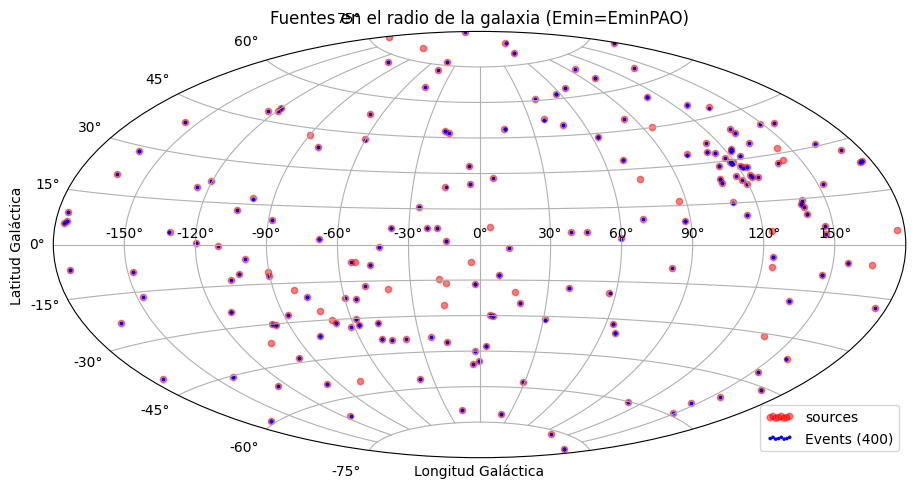

In [57]:
fig=plt.figure(figsize=(11,8))
ax=fig.add_subplot(111,projection='aitoff')

ax.scatter(ds.l.wrap_at('180d').radian,ds.b.radian,color='red',s=20,alpha=0.5,label="sources")

ax.scatter(g.l.wrap_at('180d').radian,g.b.radian,color='blue',label='Events'+' ('+str(len(g))+')',s=10,marker='.')

ax.grid(True)

plt.xlabel('Longitud Galáctica')
plt.ylabel('Latitud Galáctica')
plt.title('Fuentes en el radio de la galaxia (Emin=EminPAO)')
plt.legend(loc = 'lower right', fontsize=10, scatterpoints=8)
#plt.savefig('Galactico_H (Emin=EminPAO)')
plt.show()

In [58]:
# Lista de valores de desplazamiento
delta_values = [-8.5]

# Lista para almacenar los DataFrames
case_dfs = []

for delta in delta_values:
    # Genera el nombre del archivo basado en el valor de delta
    filename = f'Data/events_JF12_sources_distant_s=20Mpc.txt'
    
    # Carga los datos desde el archivo
    d = np.genfromtxt(filename, names=True)
    
    # Crea un DataFrame para el caso actual
    case_df = pd.DataFrame(columns=['X', 'Y', 'Z', 'X0', 'Y0', 'Z0'], index=range(0, len(d)))
    
    case_df['X'] = d['X']
    case_df['Y'] = d['Y']
    case_df['Z'] = d['Z']
    case_df['X0'] = d['X0']
    case_df['Y0'] = d['Y0']
    case_df['Z0'] = d['Z0']
    
    c = SkyCoord(x=(d['X']-delta*10**-3), y=d['Y'], z=d['Z'], unit='Mpc', representation_type='cartesian')
    g = c.galactic
    
    c0 = SkyCoord(x=(d['X0']-delta*10**-3), y=d['Y0'], z=d['Z0'], unit='Mpc', representation_type='cartesian')
    g0 = c0.galactic
    
    case_df['l (°)'] = g.l.degree
    case_df['b (°)'] = g.b.degree
    
    case_df['l0 (°)'] = g0.l.degree
    case_df['b0 (°)'] = g0.b.degree
    
    case_df = case_df.dropna()

    case_df['Δl(°)'] = case_df.apply(lambda row: calcular_desviacion_angular(row['l (°)'], row['l0 (°)']), axis=1)
    case_df['Δb(°)'] = case_df.apply(lambda row: calcular_desviacion_angular(row['b (°)'], row['b0 (°)']), axis=1)
    
    case_df['|Δl(°)|'] = case_df['Δl(°)'].abs()
    case_df['|Δb(°)|'] = case_df['Δb(°)'].abs()
    
    case_dfs.append(case_df)


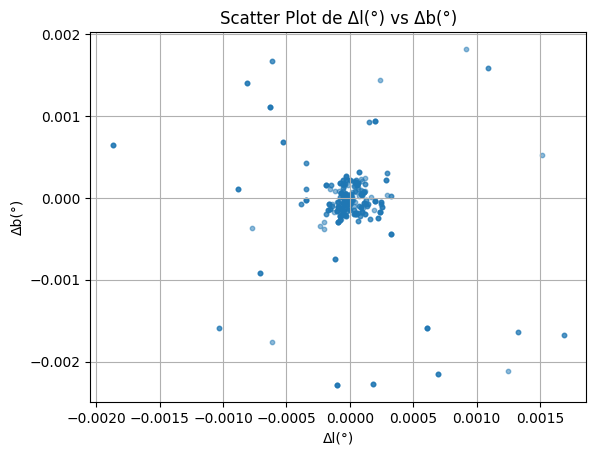

In [59]:
for df in case_dfs:
    delta_l = df['Δl(°)']
    delta_b = df['Δb(°)']

    # Crear el scatter plot
    plt.scatter(delta_l, delta_b, s=10, alpha=0.5)  

    # Etiquetas de los ejes
    plt.xlabel('Δl(°)')
    plt.ylabel('Δb(°)')

    # Título del gráfico
    plt.title('Scatter Plot de Δl(°) vs Δb(°)')
    plt.grid()
    # Mostrar el gráfico
    plt.show()